# À propos de ce livret


### But du livret
Présenter les résultats



### Notes sur le livret

## Préparation préalable

In [1]:
# Utilités
import os
import numpy as np
import pandas as pd

# Chargement des données
import scipy.io
import json

# Barre de progression
from tqdm.auto import trange
from tqdm import tqdm_notebook, notebook

# Présentation
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# Présentation des résultats

In [25]:
dossier = "./exp"
dossier_donnees = "/transport_Seattle"
donnees = "seattle"
format_donnees = "50"
manquants = "50"
methode = "FMNN"
type_entrainement = "simple"

"{:}{:}/{:}_{:}_{:}_{:}-{:}".format(dossier, dossier_donnees, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

'./exp/transport_Seattle/seattle_50_50_FMNN-simple'

## Tableau comparatif

In [15]:
## À continuer
fichier_comparatif = "/fichier_comparatif.csv"
chemin_fcompar = "{:}{:}".format(dossier, fichier_comparatif)

tableau_comparatif = pd.read_csv(chemin_fcompar,
                                 header=None,
                                 usecols = [1,2,3,4,5,6],
                                 names=[
                                     "Model", "Hyperparametres",
                                     "Fichier", "RMSE", "MAPE", "Temps"
                                 ])
tableau_comparatif

,Model,Hyperparametres,Fichier,RMSE,MAPE,Temps
0,FMNN,rang: 10 | epsilon: 2.2204e-16 | algorithme: n...,seattle_mat50bin50,33.0053,0.537619,15.855 secs
1,FMNN,rang: 5 | epsilon: 0 | algorithme: 1,seattle_mat50bin50,31.3649,0.527346,0.122045 secs
2,FMNN,rang: 5 | epsilon: 0 | algorithme: 1,seattle_mat50bin50,31.3649,0.527346,0.181002 secs
3,FMNN,rang: 5 | epsilon: 0 | algorithme: 1,seattle_mat50bin50,31.3649,0.527346,0.109037 secs
4,FMNN,rang: 10 | epsilon: 2.2204e-16 | algorithme: n...,seattle_mat50bin50,33.0053,0.537619,13.546 secs
5,FMNN,rang: 5 | epsilon: 0 | algorithme: 1,seattle_mat50bin50,31.3649,0.527346,0.117037 secs
6,FMNN,rang: 10 | epsilon: 2.2204e-16 | algorithme: n...,seattle_50_50,33.0053,0.537619,13.6809 secs
7,FMNN,rang: 10 | epsilon: 2.2204e-16 | algorithme: n...,seattle_50_50,33.0053,0.537619,13.6809 secs
8,FMNN,rang: 10 | epsilon: 2.2204e-16 | algorithme: n...,seattle_50_50,33.0053,0.537619,13.6809 secs
9,FMNN,rang: 5 | epsilon: 0 | algorithme: 1,seattle_50_50,31.3649,0.527346,0.115925 secs


## Présentations graphiques

'./exp/transport_Seattle/ligne1_seattle_50_50_FMNN-simple.json'

In [30]:
## Chargement des informations pour les graphiques


ligne = "ligne1"
fichier_graph1 = "{:}{:}/{:}_{:}_{:}_{:}_{:}-{:}.json".format(dossier, dossier_donnees, ligne, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

ligne = "ligne1"
fichier_graph1 = "{:}{:}/{:}_{:}_{:}_{:}_{:}-{:}.json".format(dossier, dossier_donnees, ligne, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

ligne = "ligne2"
fichier_graph2 = "{:}{:}/{:}_{:}_{:}_{:}_{:}-{:}.json".format(dossier, dossier_donnees, ligne, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

ligne = "ligne3"
fichier_graph3 = "{:}{:}/{:}_{:}_{:}_{:}_{:}-{:}.json".format(dossier, dossier_donnees, ligne, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

ligne = "ligne4"
fichier_graph4 = "{:}{:}/{:}_{:}_{:}_{:}_{:}-{:}.json".format(dossier, dossier_donnees, ligne, donnees,
                                   format_donnees, manquants, methode,
                                   type_entrainement)

with open(fichier_graph1, 'r') as j:
    list_data1 = json.load(j)
list_data1 = [np.array(list_data1[0]), np.array(list_data1[1])]

with open(fichier_graph2, 'r') as j:
    list_data2 = json.load(j)
list_data2 = [np.array(list_data2[0]), np.array(list_data2[1])]

with open(fichier_graph3, 'r') as j:
    list_data3 = json.load(j)
list_data3 = [np.array(list_data3[0]), np.array(list_data3[1])]

with open(fichier_graph4, 'r') as j:
    list_data4 = json.load(j)
list_data4 = [np.array(list_data4[0]), np.array(list_data4[1])]

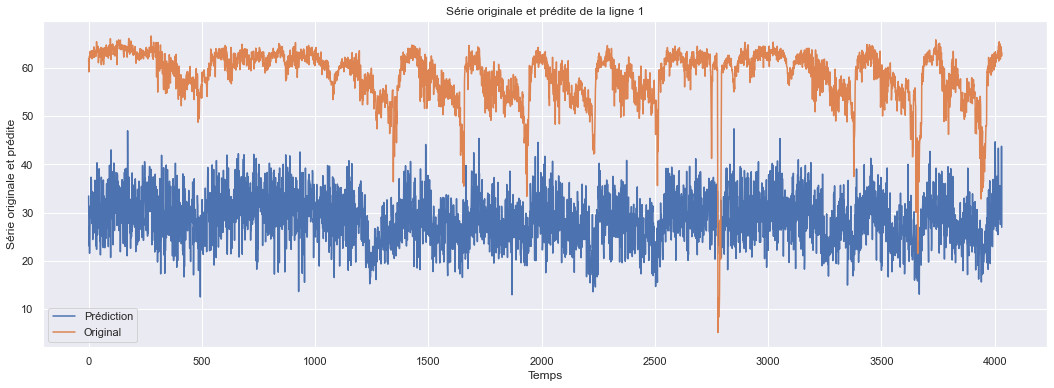

In [31]:
## Première ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data1, dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 1')
plt.show()

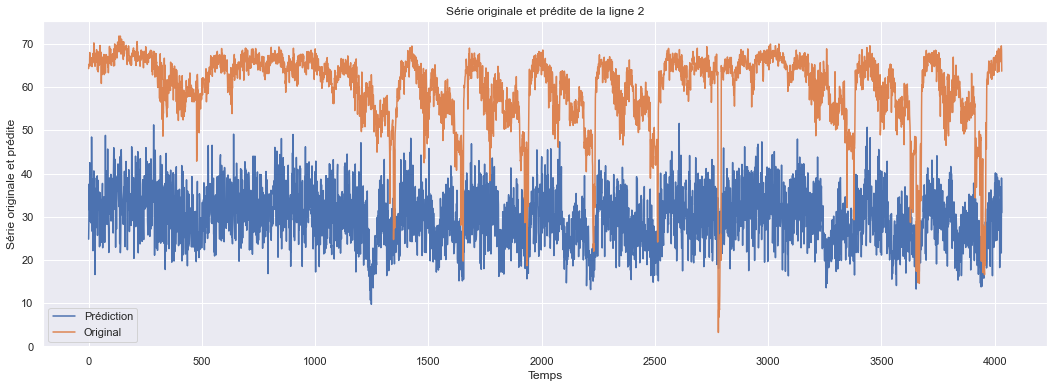

In [7]:
## Deuxième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data2, dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 2')
plt.show()

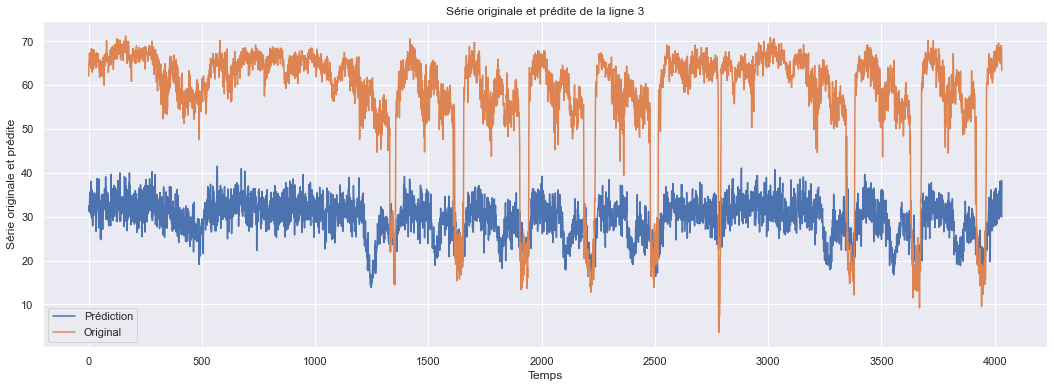

In [8]:
## Troisième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data3, dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 3')
plt.show()

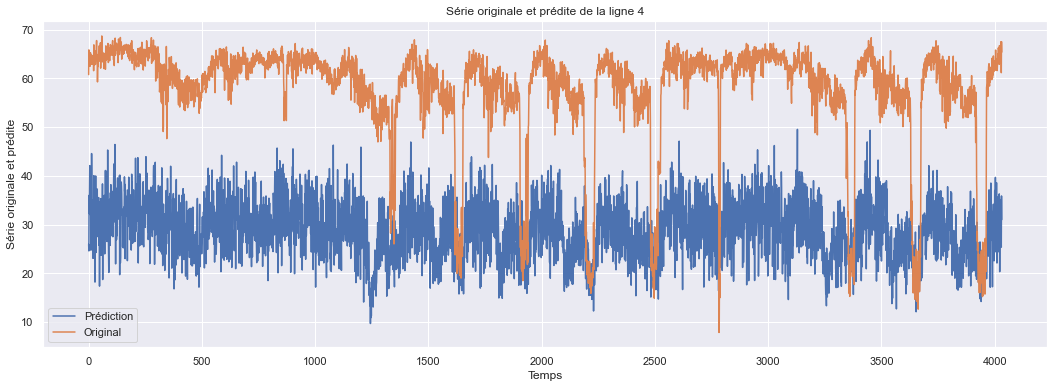

In [9]:
## Quatrième ligne
fig = plt.figure(figsize=(18, 6))
ax = sns.lineplot(data=list_data4, dashes=False)
ax.set_xlabel('Temps')
ax.set_ylabel('Série originale et prédite')
ax.legend(['Prédiction', 'Original'])
ax.set_title('Série originale et prédite de la ligne 4')
plt.show()

## Comparaison pred vs. original

Cette comparaison montre si les données sont plus ou moins proche de la donnée originale.


Source pour le paquet : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [10]:
## Chargement des données comparatives
nom_fichier = "_index-comparaison"
fichier_comparaisons = "{:}{:}{:}{:}.mat".format(dossier_exp, dossier, fichier_pred, nom_fichier)
df_comparaisons = scipy.io.loadmat(fichier_comparaisons)["index_comparaison"]
df_comparaisons = pd.DataFrame(df_comparaisons, columns = ['x_pred', 'y_original', 'dist_axe', "size"])

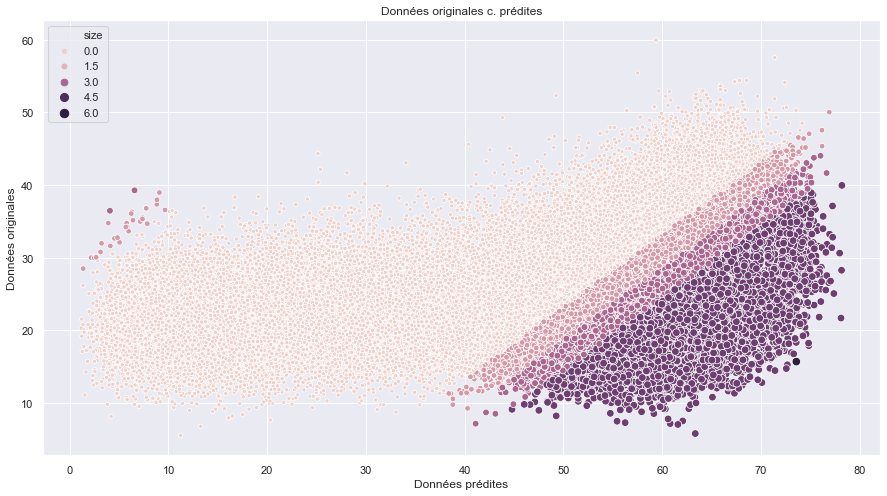

In [11]:
# Plus le cercle est foncé, moins la prédiction est proche de la vraie valeur
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="x_pred",
                     y="y_original",
                     hue="size",
                     size="size",
                     data=df_comparaisons)

ax.set(xlabel='Données prédites', ylabel='Données originales', title = "Données originales c. prédites")
plt.show()